In [7]:
import numpy as np
mutated_data = np.load("/content/MUTATION_DATA_TRAINING_6000.npz", allow_pickle=True)
mutated_test = mutated_data['arr_0'][:1000]
output_test = "MUTATED_DATA_TEST_1000_6000"
np.savez_compressed(output_test, arr_0=np.array(mutated_test))
mutated_val = mutated_data['arr_0'][5000:]
output_val = "MUTATED_DATA_VAL_1000_6000"
np.savez_compressed(output_val, arr_0=np.array(mutated_val))
mutated_train = mutated_data['arr_0'][1000:5000]
output_train = "MUTATED_DATA_TRAIN_5000_6000"
np.savez_compressed(output_train, arr_0=np.array(mutated_train))



BadZipFile: Bad magic number for file header

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import tensorflow as tf
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from tensorflow.keras import regularizers
# Load mutated sequences and non-mutated sequences


# Load CSV with allele frequencies
def load_sequences(data):
    encoded_sequences = None
    for key in data.files:
        temp_sequences = data[key]
        if temp_sequences.ndim == 2:  # If 2D, reshape to 3D for LSTM
            temp_sequences = np.expand_dims(temp_sequences, axis=1)  # (samples, 1, features)
        if temp_sequences.ndim == 3:
            encoded_sequences = temp_sequences

            break
    return encoded_sequences
def load_sequences_with_shape(data):
    encoded_sequences = None
    for key in data.files:
        temp_sequences = data[key]
        if temp_sequences.ndim == 2:  # If 2D, reshape to 3D for LSTM
            temp_sequences = np.expand_dims(temp_sequences, axis=1)  # (samples, 1, features)
        if temp_sequences.ndim == 3:
            encoded_sequences = temp_sequences
            input_shape = input_shape=(encoded_sequences.shape[1], encoded_sequences.shape[2])
            break
    return encoded_sequences, input_shape
mutated_data = np.load("/content/MUTATION_DATA_TRAINING_6000.npz", allow_pickle=True)
nonmutated_data = np.load("/content/AUGMENTED_DATA_TRAINING_6000.npz", allow_pickle=True)
mutated_sequences, shape = load_sequences_with_shape(mutated_data)
nonmutated_sequences, shape = load_sequences_with_shape(nonmutated_data)

mutated_test_1 = np.load("/content/MUTATED_DATA_TEST_1000_6000.npz", allow_pickle=True)
mutated_test = load_sequences(mutated_test_1)
mutated_test_label = np.ones(mutated_test.shape[0])
mutated_test, mutated_test_label = shuffle(mutated_test, mutated_test_label, random_state=42)

mutated_val_1 = np.load("/content/MUTATED_DATA_VAL_1000_6000.npz", allow_pickle=True)
mutated_val = load_sequences(mutated_val_1)
mutated_val_label = np.ones(mutated_val.shape[0])
mutated_val, mutated_val_label = shuffle(mutated_val, mutated_val_label, random_state=42)

mutated_train_1 = np.load("/content/MUTATED_DATA_TRAIN_5000_6000.npz", allow_pickle=True)
mutated_train = load_sequences(mutated_train_1)
mutated_train_label = np.ones(mutated_train.shape[0])
mutated_train, mutated_train_label = shuffle(mutated_train, mutated_train_label, random_state=42)

nonmutated_test_1 = np.load("/content/AUGMENTED_DATA_TEST_1000_6000.npz", allow_pickle=True)
nonmutated_test = load_sequences(nonmutated_test_1)
nonmutated_test_label = np.zeros(nonmutated_test.shape[0])
nonmutated_test, nonmutated_test_label = shuffle(nonmutated_test, nonmutated_test_label, random_state=42)

nonmutated_val_1 = np.load("/content/AUGMENTED_DATA_TEST_VAL_1000_6000.npz", allow_pickle=True)
nonmutated_val = load_sequences(nonmutated_val_1)
nonmutated_val_label = np.zeros(nonmutated_val.shape[0])
nonmutated_val, nonmutated_val_label = shuffle(nonmutated_val, nonmutated_val_label, random_state=42)

nonmutated_train_1 = np.load("/content/AUGMENTED_DATA_TRAIN_5000_6000.npz", allow_pickle=True)
nonmutated_train = load_sequences(nonmutated_train_1)
nonmutated_train_label = np.zeros(nonmutated_train.shape[0])
nonmutated_train, nonmutated_train_label = shuffle(nonmutated_train, nonmutated_train_label, random_state=42)

X_val = np.concatenate([mutated_val, nonmutated_val], axis = 0)
y_val = np.concatenate([mutated_val_label, nonmutated_val_label], axis = 0)
X_val, y_val = shuffle(X_val, y_val, random_state=42)

X_test = np.concatenate([mutated_test, nonmutated_test], axis = 0)
y_test = np.concatenate([mutated_test_label, nonmutated_test_label], axis = 0)
X_test, y_test = shuffle(X_test, y_test, random_state=42)

X_train = np.concatenate([mutated_train, nonmutated_train], axis = 0)
y_train = np.concatenate([mutated_train_label, nonmutated_train_label], axis = 0)
X_train, y_train = shuffle(X_train, y_train, random_state=42)


In [ ]:
checkpoint_path = "E:/my_models/750_if_new_best_model.weights.h5"

In [9]:
from tensorflow.keras.layers import LSTM, GRU, Dropout, Dense, BatchNormalization

In [10]:
def rnn_model(input_shape):
    model = Sequential([

        # First LSTM Layer
        LSTM(32, input_shape=input_shape, return_sequences=False, activation="relu"),
        Dropout(0.5),
        Dense(1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(0.01))
    ])

    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model
def reset_rnn(input_shape):
    # Recreate the model to reset weights
    model = rnn_model(input_shape)
    return model

# Train the model
checkpoint_path = "E:/my_models/6000_1_if_new_best_model.weights.h5"
model1 = reset_rnn(shape)
checkpoint = ModelCheckpoint(checkpoint_path, save_best_only=True, save_weights_only=True, verbose=1)
csv_logger = CSVLogger("training_log_6000_1.csv")

history = model1.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=20, batch_size=64, callbacks=[checkpoint, csv_logger])


# Evaluate the model
y_pred = model1.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")

# Evaluate model performance
print(classification_report(y_test, y_pred_classes))
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC: {roc_auc}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"ROC curve (AUC = {roc_auc:.5f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic Curve")
plt.legend(loc="lower right")
plt.show()

# Test Accuracy
loss, accuracy = model1.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Predictions
predictions = model1.predict(X_test).flatten()
print("\n🔹 First 10 Predictions vs Actual Values 🔹")
for i in range(10):
    print(f"Sample {i+1}: Actual = {y_test[i]}, Predicted Probability = {predictions[i]:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8810 - loss: 0.4261
Epoch 1: val_loss improved from inf to 0.00258, saving model to E:/my_models/6000_1_if_new_best_model.weights.h5
125/125 ━━━━━━━━━━━━━━━━━━━━ 171s 1s/step - accuracy: 0.8816 - loss: 0.4243 - val_accuracy: 1.0000 - val_loss: 0.0026
Epoch 2/20
 61/125 ━━━━━━━━━━━━━━━━━━━━ 1:17 1s/step - accuracy: 1.0000 - loss: 0.0039

KeyboardInterrupt: 

60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       960
         1.0       1.00      0.99      0.99       960

    accuracy                           0.99      1920
   macro avg       0.99      0.99      0.99      1920
weighted avg       0.99      0.99      0.99      1920

ROC-AUC: 0.9957921006944443


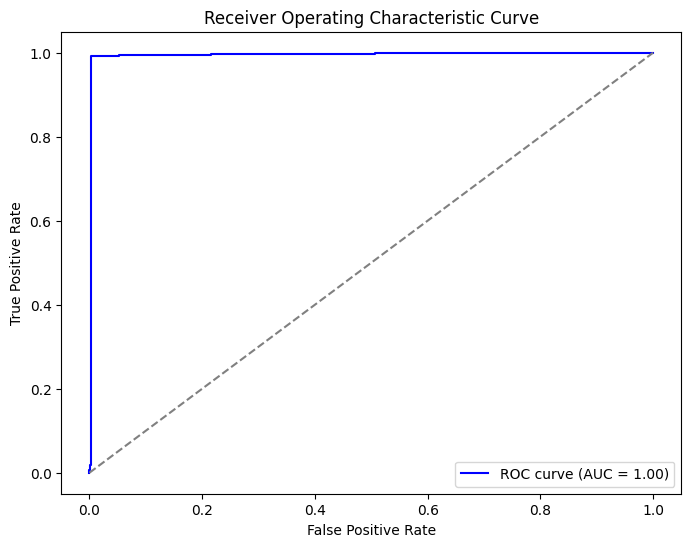

60/60 ━━━━━━━━━━━━━━━━━━━━ 13s 214ms/step - accuracy: 0.9940 - loss: 2.9406
Test Accuracy: 0.9948
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step

🔹 First 10 Predictions vs Actual Values 🔹
Sample 1: Actual = 0.0, Predicted Probability = 0.1477
Sample 2: Actual = 1.0, Predicted Probability = 0.5252
Sample 3: Actual = 0.0, Predicted Probability = 0.1689
Sample 4: Actual = 1.0, Predicted Probability = 0.5252
Sample 5: Actual = 1.0, Predicted Probability = 0.5252
Sample 6: Actual = 1.0, Predicted Probability = 0.5252
Sample 7: Actual = 0.0, Predicted Probability = 0.1281
Sample 8: Actual = 1.0, Predicted Probability = 0.5252
Sample 9: Actual = 1.0, Predicted Probability = 0.5252
Sample 10: Actual = 1.0, Predicted Probability = 0.5252


In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")

# Evaluate model performance
print(classification_report(y_test, y_pred_classes))
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC: {roc_auc}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic Curve")
plt.legend(loc="lower right")
plt.show()

# Test Accuracy
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Predictions
predictions = model.predict(X_test).flatten()
print("\n🔹 First 10 Predictions vs Actual Values 🔹")
for i in range(10):
    print(f"Sample {i+1}: Actual = {y_test[i]}, Predicted Probability = {predictions[i]:.4f}")

In [ ]:
import shap
explainer = shap.Explainer(model, X_train)
explainer = shap.GradientExplainer(model, X_train_combined[:100])
# Calculate SHAP values for the input data
shap_values = explainer(X_train)






KeyboardInterrupt: 

In [ ]:
shap.summary_plot(shap_values, input_data)

In [ ]:
shap.initjs()  # Initialize JavaScript visualization
shap.force_plot(shap_values[0], input_data[0]

In [ ]:
shap.dependence_plot("feature_name", shap_values, input_data)

In [ ]:
shap.waterfall_plot(shap_values[0])